In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

ecg_path = '/tf/hsh/new_ecg/lead2/'

In [2]:
ecg_list = os.listdir(ecg_path)

In [3]:
df = pd.read_csv(f"{ecg_path}/{ecg_list[0]}")
df

,Unnamed: 0,II,super_class,HYP,NORM,MI,CD,STTC,strat_fold
0,0 days 00:00:00,-0.050,['NORM'],0,1,0,0,0,3
1,0 days 00:00:00.002000,-0.050,['NORM'],0,1,0,0,0,3
2,0 days 00:00:00.004000,-0.050,['NORM'],0,1,0,0,0,3
3,0 days 00:00:00.006000,-0.050,['NORM'],0,1,0,0,0,3
4,0 days 00:00:00.008000,-0.050,['NORM'],0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...
2495,0 days 00:00:04.990000,-0.005,['NORM'],0,1,0,0,0,3
2496,0 days 00:00:04.992000,-0.017,['NORM'],0,1,0,0,0,3
2497,0 days 00:00:04.994000,-0.027,['NORM'],0,1,0,0,0,3
2498,0 days 00:00:04.996000,-0.032,['NORM'],0,1,0,0,0,3


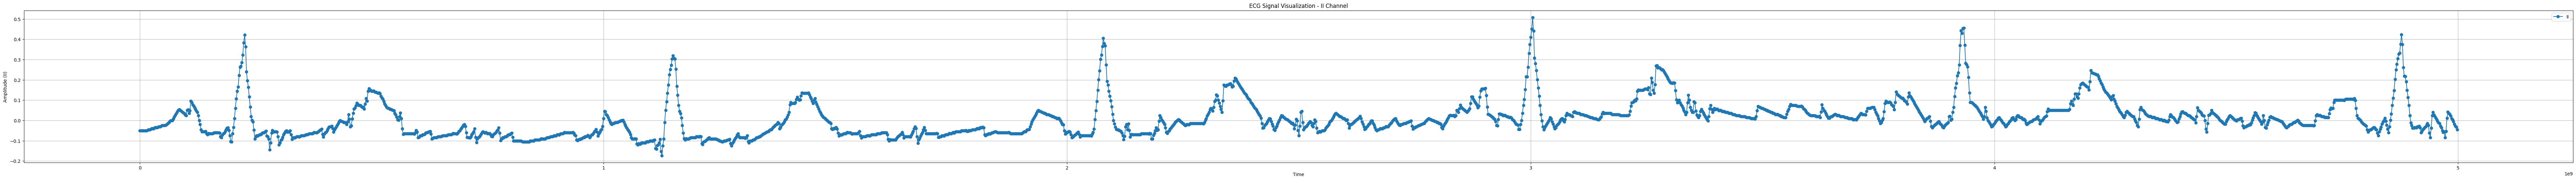

In [4]:
# Convert the time column to datetime
df['Time'] = pd.to_timedelta(df['Unnamed: 0'])

# Plot the II channel over time
plt.figure(figsize=(100, 6))
plt.plot(df['Time'], df['II'], marker='o', linestyle='-', label='II')
plt.xlabel('Time')
plt.ylabel('Amplitude (II)')
plt.title('ECG Signal Visualization - II Channel')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
# Convert the time column to timedelta
df['Time'] = pd.to_timedelta(df['Unnamed: 0'])

# Define thresholds to detect P, QRS, and T waves based on amplitudes
p_threshold = 0.1  # A small amplitude (positive or negative)
qrs_threshold = 0.4  # A sharp peak, larger than other thresholds
t_threshold = 0.2  # A moderate amplitude peak

# Initialize tokens list
tokens = []

# Loop through the II channel to detect and tokenize based on amplitude
for index, row in df.iterrows():
    amplitude = row['II']
    
    # Detect P wave
    if abs(amplitude) < p_threshold:
        tokens.append("<P>")
    # Detect QRS complex
    elif abs(amplitude) >= qrs_threshold:
        tokens.append("<QRS>")
    # Detect T wave
    elif abs(amplitude) >= t_threshold:
        tokens.append("<T>")
    
    # Optionally, add amplitude as a token
    tokens.append(f"<AMPL:{amplitude:.3f}>")

# Join tokens into a single string
token_sequence = " ".join(tokens)
print("Tokenized ECG Sequence:", token_sequence)


Tokenized ECG Sequence: <P> <AMPL:-0.050> <P> <AMPL:-0.050> <P> <AMPL:-0.050> <P> <AMPL:-0.050> <P> <AMPL:-0.050> <P> <AMPL:-0.050> <P> <AMPL:-0.050> <P> <AMPL:-0.051> <P> <AMPL:-0.048> <P> <AMPL:-0.045> <P> <AMPL:-0.045> <P> <AMPL:-0.045> <P> <AMPL:-0.042> <P> <AMPL:-0.039> <P> <AMPL:-0.040> <P> <AMPL:-0.040> <P> <AMPL:-0.036> <P> <AMPL:-0.034> <P> <AMPL:-0.036> <P> <AMPL:-0.034> <P> <AMPL:-0.030> <P> <AMPL:-0.030> <P> <AMPL:-0.031> <P> <AMPL:-0.028> <P> <AMPL:-0.025> <P> <AMPL:-0.025> <P> <AMPL:-0.025> <P> <AMPL:-0.025> <P> <AMPL:-0.023> <P> <AMPL:-0.019> <P> <AMPL:-0.015> <P> <AMPL:-0.011> <P> <AMPL:-0.007> <P> <AMPL:-0.002> <P> <AMPL:0.000> <P> <AMPL:0.000> <P> <AMPL:0.008> <P> <AMPL:0.016> <P> <AMPL:0.024> <P> <AMPL:0.032> <P> <AMPL:0.040> <P> <AMPL:0.048> <P> <AMPL:0.054> <P> <AMPL:0.054> <P> <AMPL:0.049> <P> <AMPL:0.045> <P> <AMPL:0.041> <P> <AMPL:0.037> <P> <AMPL:0.034> <P> <AMPL:0.028> <P> <AMPL:0.025> <P> <AMPL:0.050> <P> <AMPL:0.054> <P> <AMPL:0.036> <P> <AMPL:0.049> <P> <AM

In [8]:
# Initialize lists to collect amplitudes by wave type
p_amplitudes = []
qrs_amplitudes = []
t_amplitudes = []

# Track the current wave type
current_wave = None

# Loop through tokens to group amplitudes by wave type
for token in tokens:
    if token.startswith("<P>"):
        current_wave = "P"
    elif token.startswith("<QRS>"):
        current_wave = "QRS"
    elif token.startswith("<T>"):
        current_wave = "T"
    elif token.startswith("<AMPL:"):
        amplitude = float(token.split(":")[1].replace(">", ""))
        
        # Append amplitude to the appropriate list based on current wave type
        if current_wave == "P":
            p_amplitudes.append(amplitude)
        elif current_wave == "QRS":
            qrs_amplitudes.append(amplitude)
        elif current_wave == "T":
            t_amplitudes.append(amplitude)

# Create a list for the shortened tokens
shortened_tokens = []

# Function to summarize amplitudes
def summarize_amplitudes(wave_type, amplitudes):
    if amplitudes:
        min_ampl = min(amplitudes)
        max_ampl = max(amplitudes)
        return f"<{wave_type}_AMPL:{min_ampl:.3f}-{max_ampl:.3f}>"
    return None

# Summarize P, QRS, and T amplitudes
p_summary = summarize_amplitudes("P", p_amplitudes)
qrs_summary = summarize_amplitudes("QRS", qrs_amplitudes)
t_summary = summarize_amplitudes("T", t_amplitudes)

# Append summarized tokens if they exist
if p_summary:
    shortened_tokens.append("<P>")
    shortened_tokens.append(p_summary)
if qrs_summary:
    shortened_tokens.append("<QRS>")
    shortened_tokens.append(qrs_summary)
if t_summary:
    shortened_tokens.append("<T>")
    shortened_tokens.append(t_summary)

# Join the summarized tokens into a single string
token_sequence = " ".join(shortened_tokens)
print("Shortened Tokenized ECG Sequence:", token_sequence)


Shortened Tokenized ECG Sequence: <P> <P_AMPL:-0.173-0.195> <QRS> <QRS_AMPL:0.406-0.508> <T> <T_AMPL:0.100-0.383>
